# HW5: FORECAST DAILY AVERAGE PRESSURE (PRES) IN TIANTAN, BEIJING IN 2017 MARCH
Name: Dhanabordee Mekintharanggur

Student ID: 6238077121

# Load the data

In [2110]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [2111]:
df = pd.read_csv('./PRSA_Data_Tiantan.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [2112]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


# Explore the data

<AxesSubplot:ylabel='PRES'>

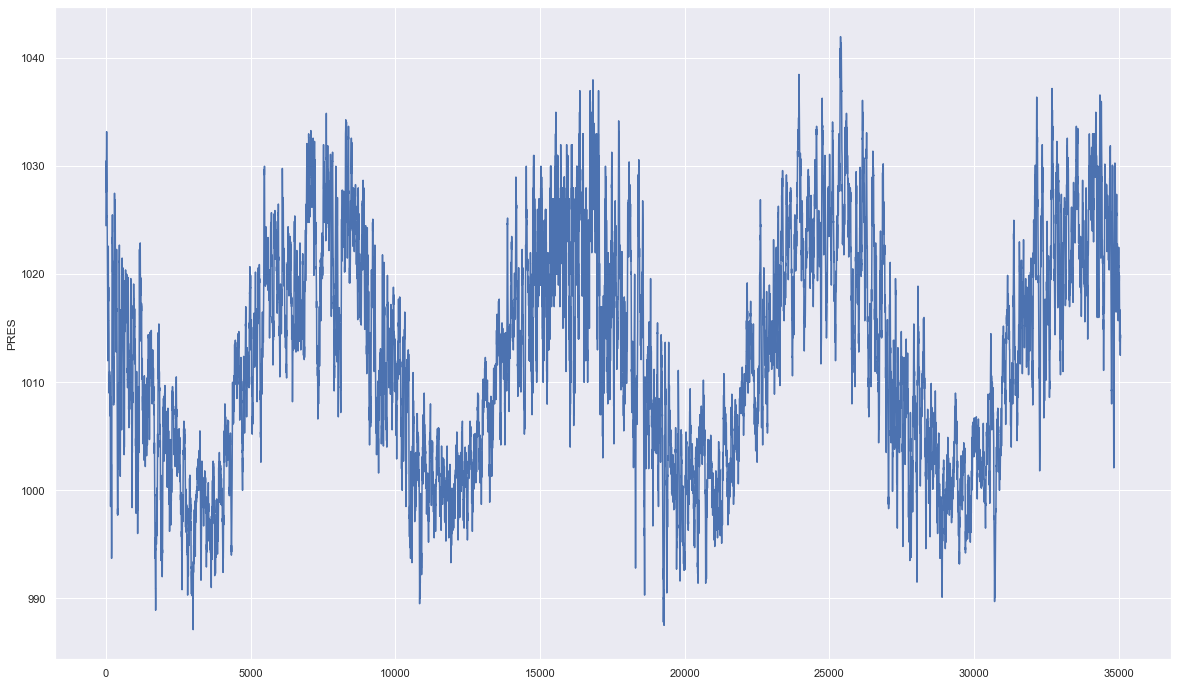

In [2113]:
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data=df['PRES'])

The PRES data appears to have a cyclic rise and fall pattern (seasonality) that lasta about a year (8760 hourly data points) with a slight upward trend.

There appears to be a little over 4 seasons, each with period lasting a year.

In [2114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [2115]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Only the PRES value will be used to create the time series. Since thre is no causal relationship for PRES and its own lag values are independent variables, the time series is considered as be a univariate time series.

The PRES column do contain 20 missing values. 

Since this is a time-series problem, the missing values can be interpolated. 
 
**Question: How to replace y seasonal adjustment plus interpolation????**

In [2116]:
# Interpolate the missing values
df['PRES'] = df['PRES'].interpolate()
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES          0
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

#### Set time feature as index

Note that the time measurement of the data are separated into 4 different columns: year, month, day, and hour.

Begin by creating a new column which value is a datetime derived from the year, month, day, and hour.

In [2117]:
# def createDateString(row):
#   return str(int(row['year'])) + "-" + str(int(row['month'])) + "-" +str(int(row['day']))

# df['date'] = df.apply(lambda row: createDateString(row), axis=1)
# pres_ts = pd.DataFrame(df[['hour', 'date', 'PRES']])
# pres_ts

df['datetime']=df['year'].astype(str).str.cat([df['month'].astype(str),df['day'].astype(str),df['hour'].astype(str)], sep='-')
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d-%H')
df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan,2017-02-28 22:00:00


#### Aggregate pressure daily by average

Next, the datetime features is set as the index.

Then, the pressure is aggregated daily using the mean value of PRSE measured in each of the 24 hours in the day.

In [2118]:
df=df.set_index(df['datetime'])
df = df.resample('D').mean().round(2)
df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,,,,,,
2013-03-01,12.5,2013.0,3.0,1.0,11.5,8.62,14.46,8.88,21.58,450.00,68.08,1.32,1028.78,-21.47,0.0,3.31
2013-03-02,36.5,2013.0,3.0,2.0,11.5,31.71,37.04,27.17,50.48,934.78,34.04,0.49,1028.85,-16.96,0.0,0.79
2013-03-03,60.5,2013.0,3.0,3.0,11.5,98.04,121.33,55.62,82.96,2028.96,16.92,4.99,1016.46,-12.31,0.0,1.22
2013-03-04,84.5,2013.0,3.0,4.0,11.5,22.33,37.58,16.58,42.04,895.79,53.12,10.56,1019.45,-14.00,0.0,2.50
2013-03-05,108.5,2013.0,3.0,5.0,11.5,141.67,156.38,74.33,101.67,2408.00,94.00,7.21,1012.70,-7.78,0.0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-24,34956.5,2017.0,2.0,24.0,11.5,36.42,51.88,6.71,51.83,925.00,42.57,5.17,1021.01,-11.14,0.0,1.60
2017-02-25,34980.5,2017.0,2.0,25.0,11.5,10.21,23.04,5.08,35.79,458.33,60.17,7.25,1018.81,-10.75,0.0,1.82
2017-02-26,35004.5,2017.0,2.0,26.0,11.5,24.17,41.92,7.50,52.21,612.50,45.43,7.21,1020.34,-8.26,0.0,1.57


In [2119]:
# pres_ts['date']=pd.to_datetime(pres_ts['date'])
# pres_ts

In [2120]:
# pres_ts=pres_ts.set_index(pres_ts['date'])
# pres_ts.drop(['date'],axis=1,inplace=True)
# pres_ts

The remaining features can be, then be discarded, leaving only the PRES features for the time series.

In [2121]:
df = df[['PRES']]
df

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70
...,...
2017-02-24,1021.01
2017-02-25,1018.81
2017-02-26,1020.34


Now, I have the time series data of PRES with the missing values interpolated and datetime set as the index.

In [2122]:
df.isna().sum()

PRES    0
dtype: int64

In [2123]:

# # Perform a seasonal adjustment using the seasonal_decompose function from statsmodels library
# res=sm.tsa.seasonal_decompose(pres_ts['Pres_interpolated'], model='multiplicative')
# pres_ts['PRES_seasonal_adjusted'] = res.seasonal


# # Interpolate the missing values based on the adjusted data
# pres_ts['PRES_interpolated'] = pres_ts['PRES_seasonal_adjusted'].interpolate()

# pres_ts['PRES'] = pres_ts['PRES_seasonal_adjusted'].fillna(pres_ts['PRES_interpolated'])

In [2124]:
# pres_ts = pres_ts.groupby('date').mean().drop(['hour'], axis=1)
# pres_ts

In [2125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-01 to 2017-02-28
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRES    1461 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [2126]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PRES,1461.0,1012.551704,10.063522,990.35,1004.02,1012.47,1020.96,1039.95


#### Visualizing the time series data

<AxesSubplot:xlabel='datetime'>

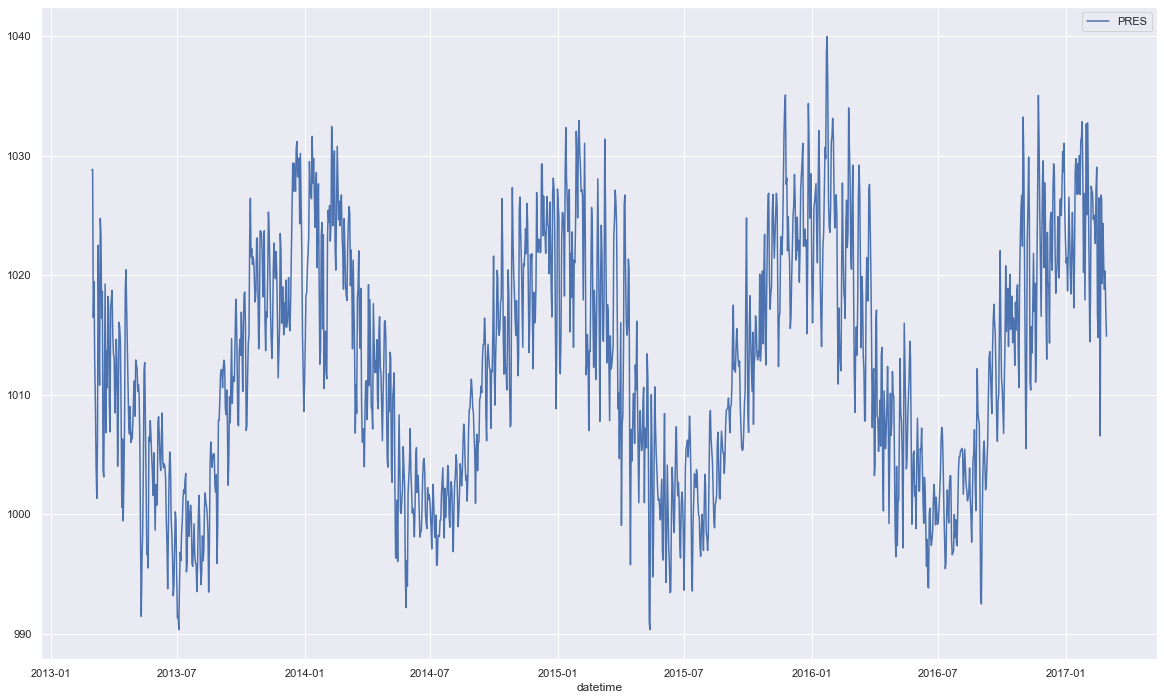

In [2127]:
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data=df)

Now, the data is properly formatted as a time series data with daily data points. 

#### Preprocess Data

In [2128]:
df_train, df_test = train_test_split(df,test_size=0.1,shuffle=False)

In [2129]:
df_train

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70
...,...
2016-09-30,1011.28
2016-10-01,1010.48
2016-10-02,1008.65


In [2130]:
df_test

,PRES
datetime,
2016-10-05,1014.31
2016-10-06,1020.78
2016-10-07,1015.28
2016-10-08,1018.00
2016-10-09,1018.90
...,...
2017-02-24,1021.01
2017-02-25,1018.81
2017-02-26,1020.34


In [2131]:
# new_dates = pd.date_range(start='1/3/2017', end='31/3/2017', freq='D')
# new_data = np.random.randint(0,100,size=(len(new_dates)))
# new_df = pd.DataFrame({'PRES': np.nan}, index=new_dates)
# df_test = df_test.append(new_df)
# df_test


In [2132]:
df_train['p_lag1']=df_train['PRES'].tshift(1)
df_train

,PRES,p_lag1
datetime,,
2013-03-01,1028.78,NaN
2013-03-02,1028.85,1028.78
2013-03-03,1016.46,1028.85
2013-03-04,1019.45,1016.46
2013-03-05,1012.70,1019.45
...,...,...
2016-09-30,1011.28,1015.47
2016-10-01,1010.48,1011.28
2016-10-02,1008.65,1010.48


In [2133]:
df_train['p_forward1']=df_train['PRES'].tshift(-1)
df_train

,PRES,p_lag1,p_forward1
datetime,,,
2013-03-01,1028.78,NaN,1028.85
2013-03-02,1028.85,1028.78,1016.46
2013-03-03,1016.46,1028.85,1019.45
2013-03-04,1019.45,1016.46,1012.70
2013-03-05,1012.70,1019.45,1009.30
...,...,...,...
2016-09-30,1011.28,1015.47,1010.48
2016-10-01,1010.48,1011.28,1008.65
2016-10-02,1008.65,1010.48,1006.76


In [2134]:
df_train['p_ma2']=df_train['PRES'].rolling(2).mean()
df_train

,PRES,p_lag1,p_forward1,p_ma2
datetime,,,,
2013-03-01,1028.78,NaN,1028.85,NaN
2013-03-02,1028.85,1028.78,1016.46,1028.815
2013-03-03,1016.46,1028.85,1019.45,1022.655
2013-03-04,1019.45,1016.46,1012.70,1017.955
2013-03-05,1012.70,1019.45,1009.30,1016.075
...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375
2016-10-01,1010.48,1011.28,1008.65,1010.880
2016-10-02,1008.65,1010.48,1006.76,1009.565


In [2135]:
df_train.isna().sum()

PRES          0
p_lag1        1
p_forward1    1
p_ma2         1
dtype: int64

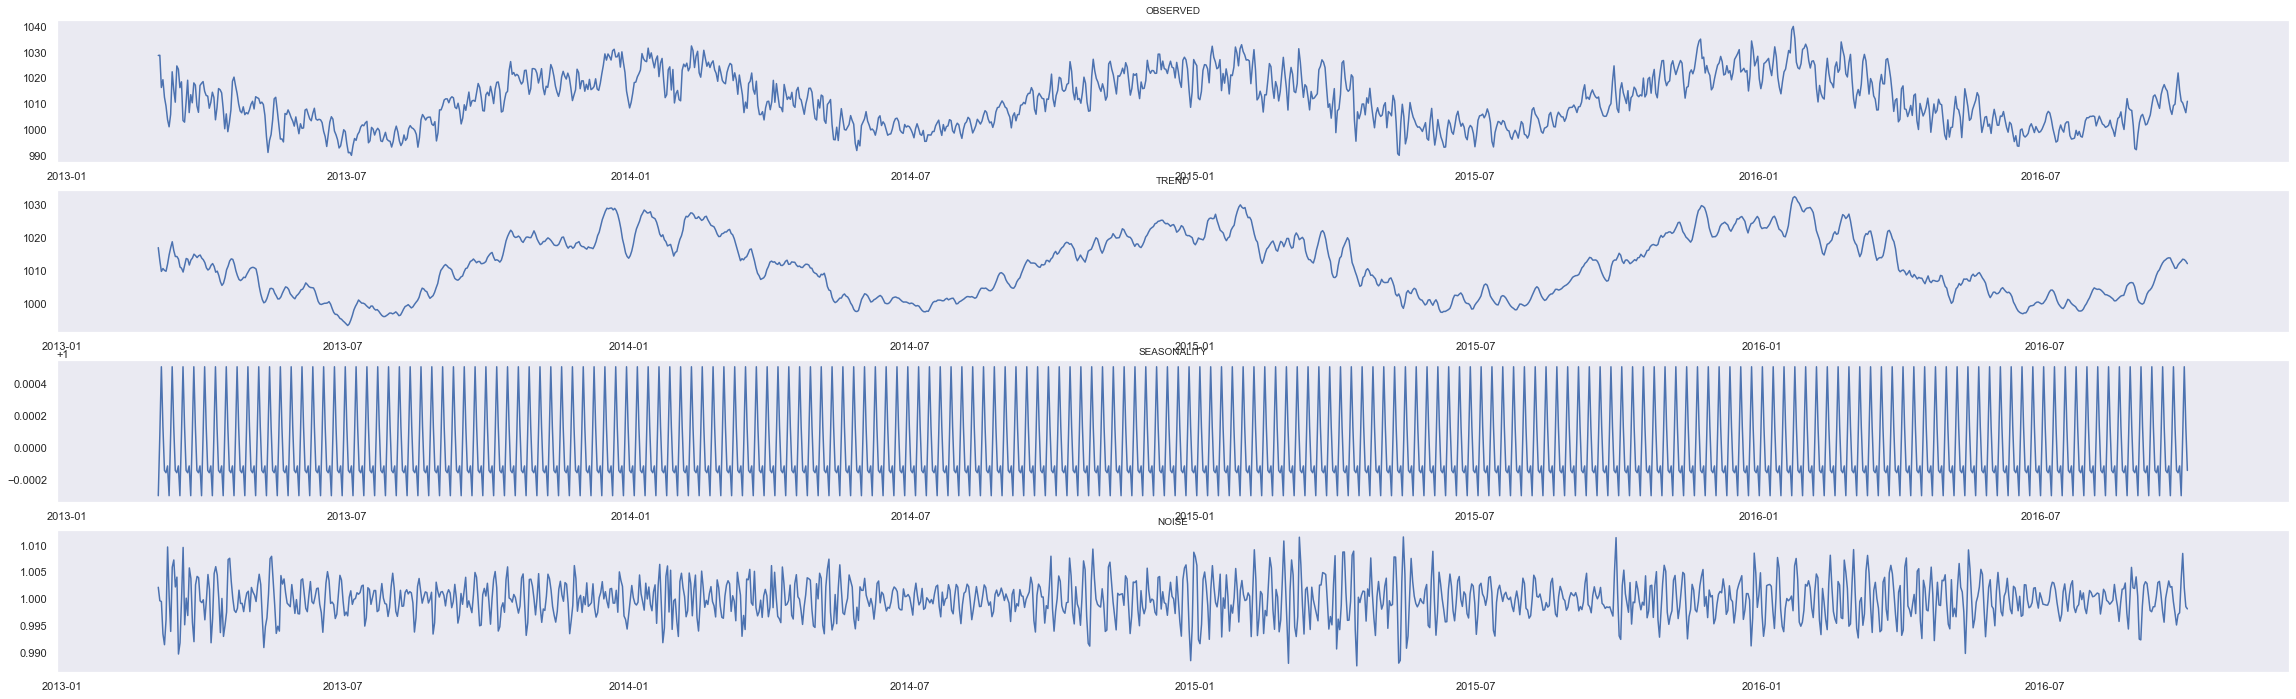

In [2136]:
sns.set(rc={'figure.figsize':(40,20)})

res=sm.tsa.seasonal_decompose(df_train['PRES'], model='multiplicative')

fig, axs = plt.subplots(4, figsize=(40,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

Upon closer inspection, the seasonality plot reveals that each season last 7 days rather than 365 days as originally observed from the time series plot.

This is because the trend shifts up and down throughout the entire time series.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

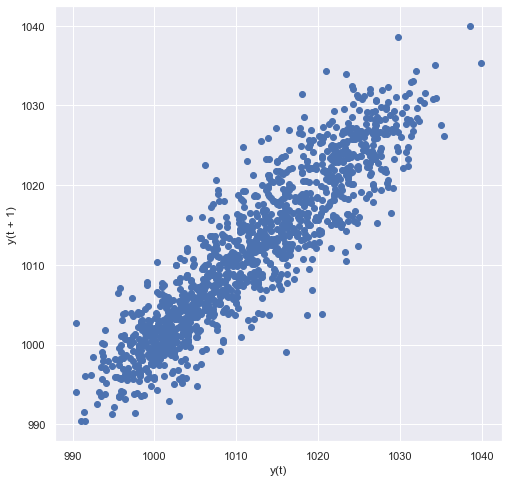

In [2137]:
sns.set(rc={'figure.figsize':(8,8)})
pd.plotting.lag_plot(df_train['PRES'])

The lag plot is used to assess the presence of autocorrelation in a time series. A linear shape to the plot suggests that an autoregressive model is probably a good choice.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

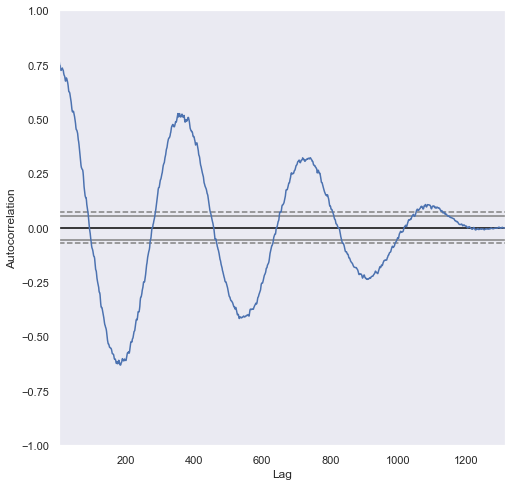

In [2138]:
pd.plotting.autocorrelation_plot(df_train['PRES'])

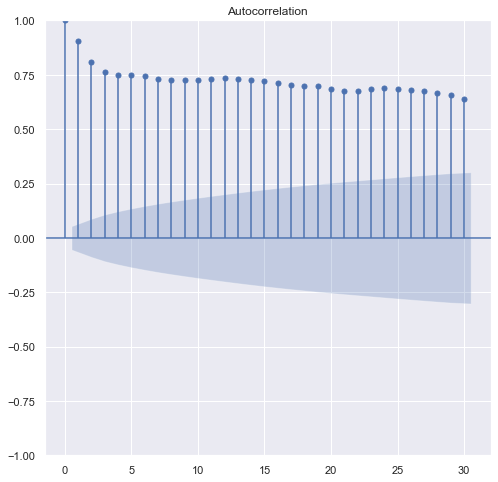

In [2139]:
sm.graphics.tsa.plot_acf(df_train['PRES'],lags=30)
plt.show()

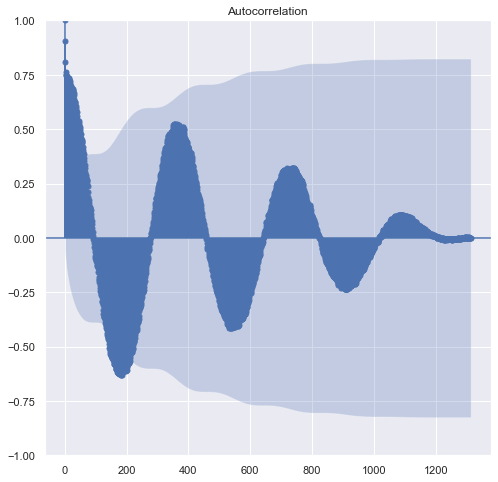

In [2140]:
sm.graphics.tsa.plot_acf(df_train['PRES'],lags=len(df_train['PRES']) - 1)
plt.show()

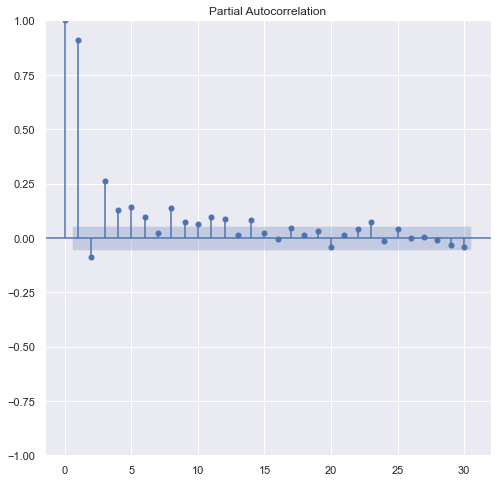

In [2141]:
sm.graphics.tsa.plot_pacf(df_train['PRES'],lags=30)
plt.show()

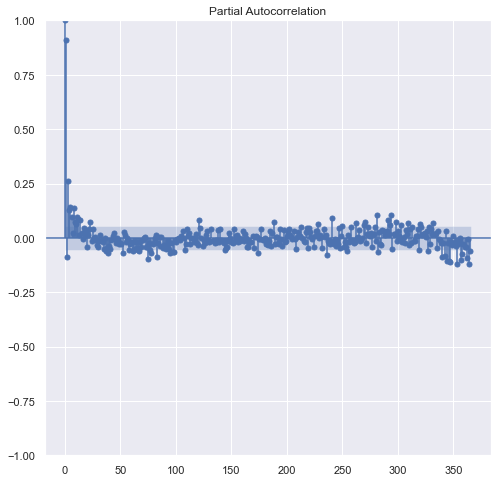

In [2142]:
sm.graphics.tsa.plot_pacf(df_train['PRES'],lags=365)
plt.show()

In [2143]:
df_train.isna().sum()

PRES          0
p_lag1        1
p_forward1    1
p_ma2         1
dtype: int64

In [2144]:
# from statsmodels.tsa.ar_model import AutoReg
# model=AutoReg(df_train['PRES'],lags=1,trend='t',seasonal=True,period=7,exog=None,missing='drop')
# result=model.fit()
# result.summary()

In [2145]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(df_train['PRES'],lags=1,trend='t',seasonal=True,period=365,exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   PRES   No. Observations:                 1314
Model:               Seas. AutoReg(1)   Log Likelihood               -3413.119
Method:               Conditional MLE   S.D. of innovations              3.256
Date:                Wed, 15 Feb 2023   AIC                           7562.238
Time:                        21:30:33   BIC                           9468.504
Sample:                    03-02-2013   HQIC                          8277.122
                         - 10-04-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.0003      0.000      1.316      0.188      -0.000       0.001
s(1,365)     356.2387     21.521     16.553      0.000     314.058     398.420
s(2,365)     353.4309     21.504     16.436      0.000     311.285     395.577
s(3,365)     354.2919     21.406     16.551      0.000     312.338     396.246
s(4,365)     357.8415     21.360     16.753      0.000     315.977     399.706
s(5,365)     355.9145     21.404     16.628      0.000     313.963     397.866
s(6,365)     354.6267     21.393     16.577      0.000     312.697     396.556
s(7,365)     353.5522     21.359     16.553      0.000     311.690     395.415
s(8,365)     354.6976     21.314     16.641      0.000     312.923     396.472
s(9,365)     362.3640     21.309     17.005      0.000     320.599     404.129
s(10,365)    360.2923     21.466     16.784      0.000     318.220     402.365
s(11,365)    352.8874     21.524     16.395      0.000     310.700     395.075
s(12,365)    353.9609     21.408     16.534      0.000     312.002     395.920
s(13,365)    357.8169     21.354     16.756      0.000     315.963     399.671
s(14,365)    356.4085     21.400     16.654      0.000     314.464     398.352
s(15,365)    351.4952     21.401     16.424      0.000     309.550     393.440
s(16,365)    353.7843     21.298     16.611      0.000     312.040     395.528
s(17,365)    351.5131     21.280     16.519      0.000     309.806     393.220
s(18,365)    353.8465     21.220     16.675      0.000     312.256     395.437
s(19,365)    355.7618     21.230     16.757      0.000     314.152     397.372
s(20,365)    359.9464     21.277     16.918      0.000     318.245     401.648
s(21,365)    352.6656     21.394     16.484      0.000     310.734     394.598
s(22,365)    357.7029     21.319     16.779      0.000     315.919     399.487
s(23,365)    356.7476     21.375     16.690      0.000     314.854     398.641
s(24,365)    358.7514     21.391     16.771      0.000     316.825     400.677
s(25,365)    355.9200     21.444     16.598      0.000     313.891     397.949
s(26,365)    353.3538     21.419     16.497      0.000     311.374     395.334
s(27,365)    352.1582     21.349     16.495      0.000     310.315     394.001
s(28,365)    352.8414     21.279     16.582      0.000     311.136     394.546
s(29,365)    353.7766     21.247     16.651      0.000     312.133     395.420
s(30,365)    354.2514     21.246     16.674      0.000     312.610     395.893
s(31,365)    354.7503     21.255     16.690      0.000     313.090     396.410
s(32,365)    352.0990     21.272     16.552      0.000     310.407     393.791
s(33,365)    350.2078     21.227     16.498      0.000     308.603     391.813
s(34,365)    358.2641     21.159     16.932      0.000     316.794     399.734
s(35,365)    353.3133     21.283     16.601      0.000     311.600     395.026
s(36,365)    356.0103     21.260     16.746      0.000     314.342     397.678
s(37,365)    355.9791     21.301     16.712      0.000     314.230     397.728
s(

In [2146]:
pred=result.predict(start='03-31-2013',end='2016-10-04')

In [2147]:
df_train['pred_PRES']=pred
df_train

,PRES,p_lag1,p_forward1,p_ma2,pred_PRES
datetime,,,,,
2013-03-01,1028.78,NaN,1028.85,NaN,NaN
2013-03-02,1028.85,1028.78,1016.46,1028.815,NaN
2013-03-03,1016.46,1028.85,1019.45,1022.655,NaN
2013-03-04,1019.45,1016.46,1012.70,1017.955,NaN
2013-03-05,1012.70,1019.45,1009.30,1016.075,NaN
...,...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375,1010.594647
2016-10-01,1010.48,1011.28,1008.65,1010.880,1011.032738
2016-10-02,1008.65,1010.48,1006.76,1009.565,1012.869286


In [2148]:
df_train1=df_train.iloc[365:].copy()
df_train1

,PRES,p_lag1,p_forward1,p_ma2,pred_PRES
datetime,,,,,
2014-03-01,1019.17,1022.26,1018.30,1020.715,1020.699471
2014-03-02,1018.30,1019.17,1017.88,1018.735,1015.883883
2014-03-03,1017.88,1018.30,1022.23,1018.090,1016.179795
2014-03-04,1022.23,1017.88,1024.32,1020.055,1019.456831
2014-03-05,1024.32,1022.23,1025.73,1023.275,1020.357062
...,...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375,1010.594647
2016-10-01,1010.48,1011.28,1008.65,1010.880,1011.032738
2016-10-02,1008.65,1010.48,1006.76,1009.565,1012.869286


In [2149]:
print('MAPE:', mean_absolute_percentage_error(df_train1['PRES'],df_train1['pred_PRES']))

MAPE: 0.002467961841664892


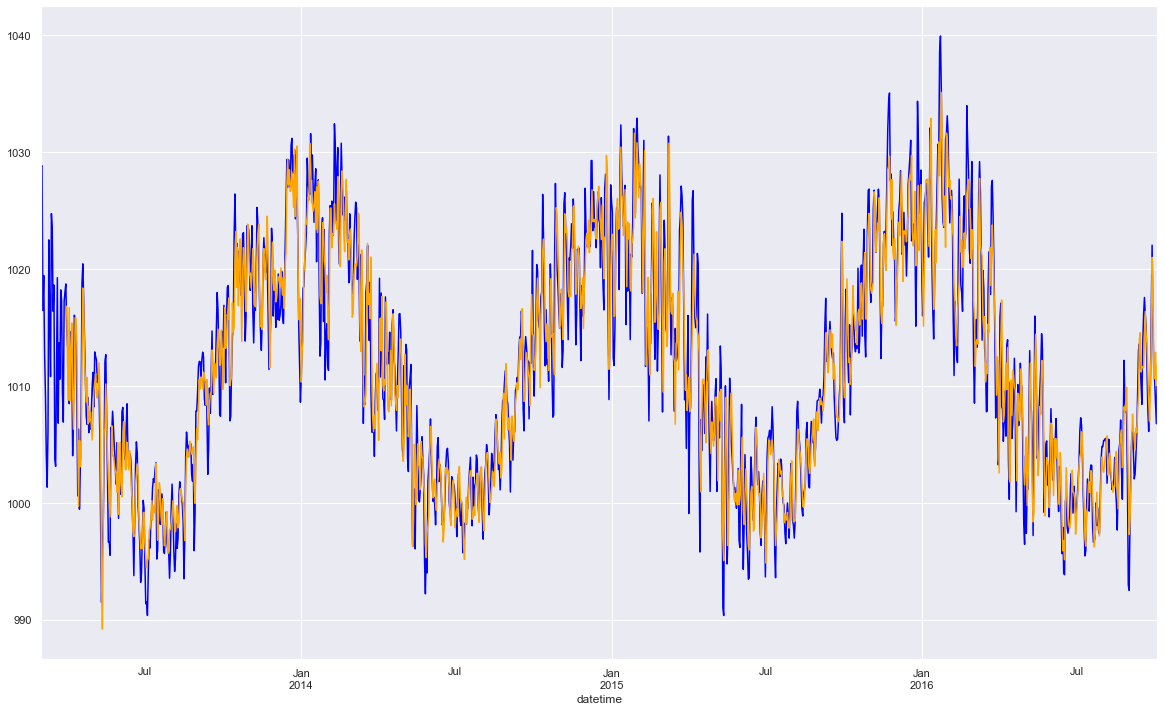

In [2150]:
sns.set(rc={'figure.figsize':(20,12)})

df_train['PRES'].plot(color='blue')
df_train['pred_PRES'].plot(color='orange')
plt.show()

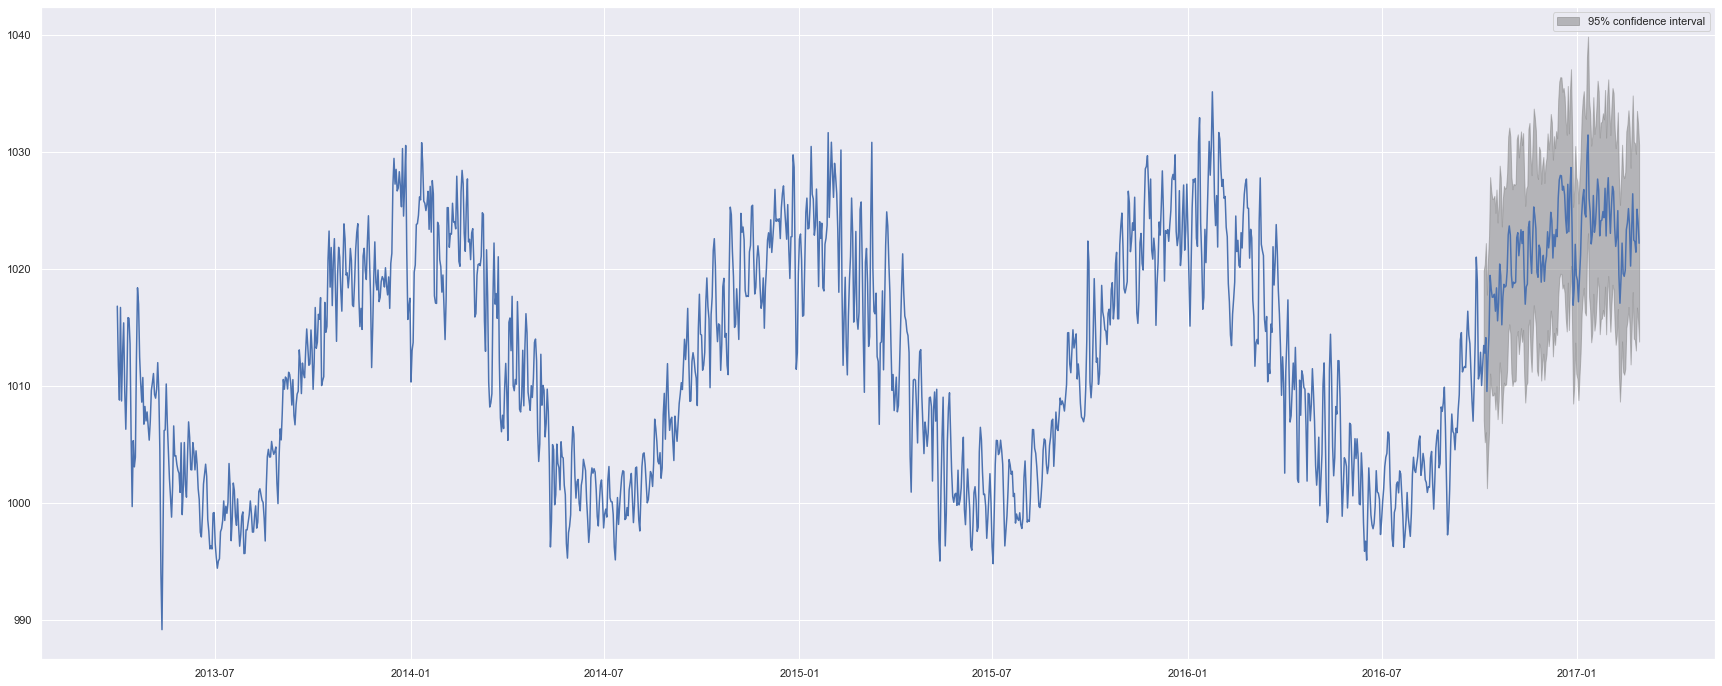

In [2151]:
sns.set(rc={'figure.figsize':(30,12)})
result.plot_predict('2013-03-31','2017-02-28')
plt.show()

In [2152]:
pred=result.predict(start='03-31-2013',end='2017-02-28')
df_test['pred_PRES']=pred
df_test

,PRES,pred_PRES
datetime,,
2016-10-05,1014.31,1013.452348
2016-10-06,1020.78,1012.797604
2016-10-07,1015.28,1014.122345
2016-10-08,1018.00,1009.527479
2016-10-09,1018.90,1012.451741
...,...,...
2017-02-24,1021.01,1022.336407
2017-02-25,1018.81,1021.419741
2017-02-26,1020.34,1025.089741


In [2153]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_PRES']))

MAPE: 0.0046740428797723875


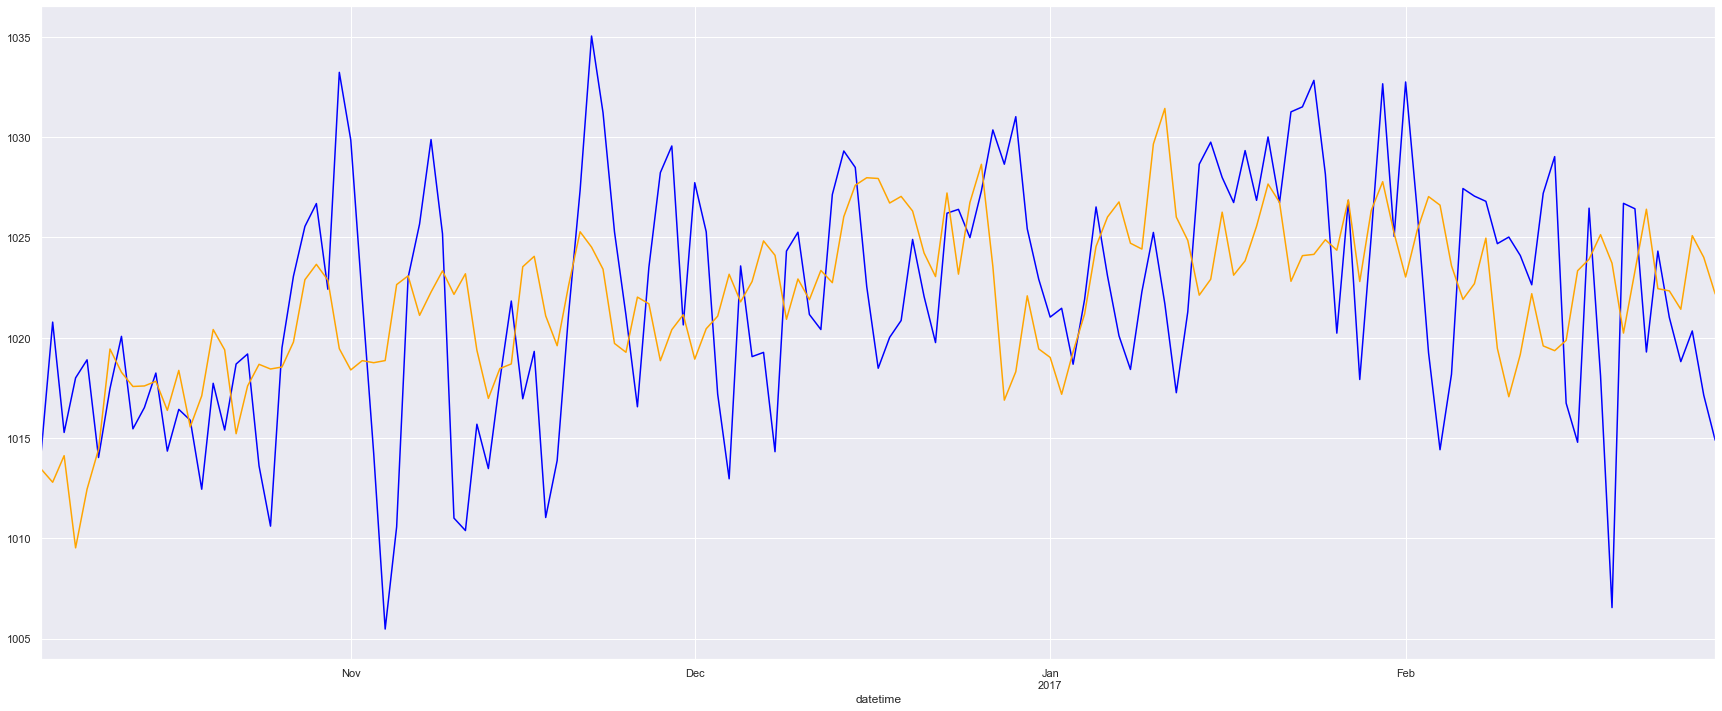

In [2154]:
df_test['PRES'].plot(color='blue')
df_test['pred_PRES'].plot(color='orange')
plt.show()

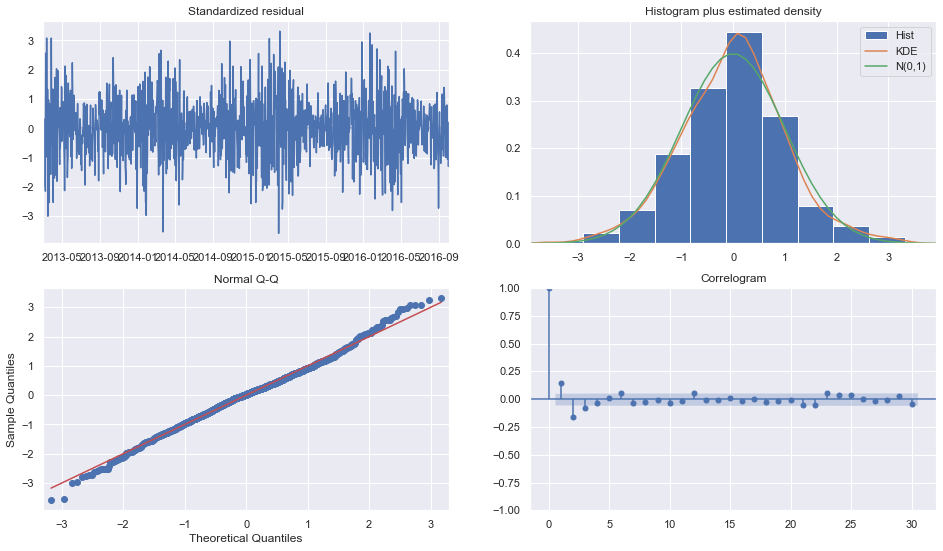

In [2155]:
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

#### Windows Forcasting

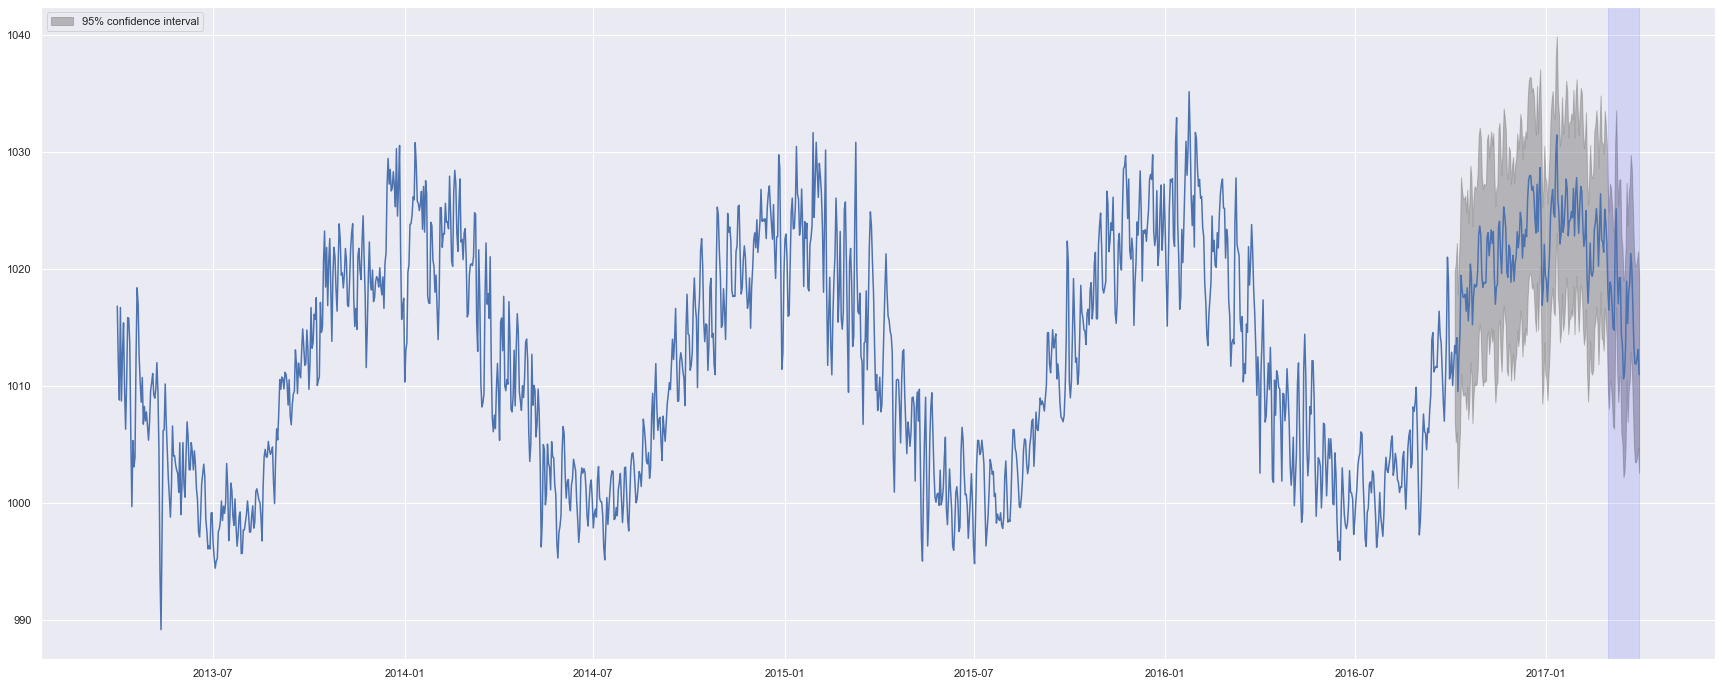

In [2156]:
pred_long=result.predict(start='03-31-2013',end='2017-03-31')
sns.set(rc={'figure.figsize':(30,12)})
result.plot_predict('03-31-2013','2017-03-31')
plt.axvspan('2017-03-01','2017-03-31', color="blue", alpha=0.1)
plt.show()

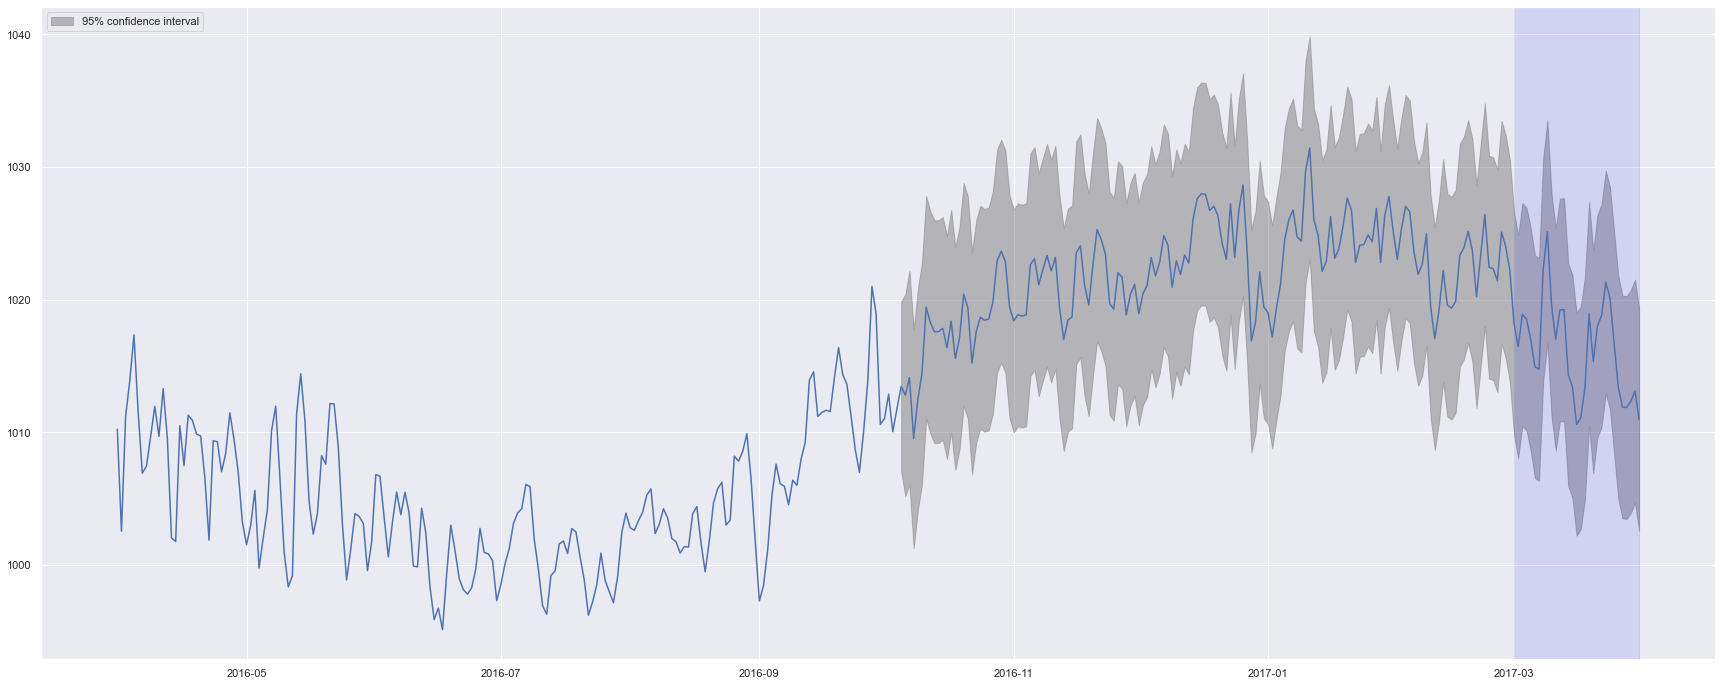

In [2157]:
pred_long=result.predict(start='2016-03-31',end='2017-03-31')
sns.set(rc={'figure.figsize':(30,12)})
result.plot_predict('2016-03-31','2017-03-31')
plt.axvspan('2017-03-01','2017-03-31', color="blue", alpha=0.1)
plt.show()

In [2158]:
df_test_shifted=df_test[['PRES']].copy()

In [2159]:
training_window=120
train_ts=df_train['PRES']
test_ts=df_test_shifted
history=[x for x in train_ts]

In [2160]:
# get first training window
history=history[(-training_window):]

In [2161]:
prediction=list()

In [2162]:
for t in range(len(test_ts)):
    model=AutoReg(history,lags=1,trend='t',seasonal=True,period=7,exog=None,missing='drop')
    model_fit=model.fit()
    yhat=model_fit.predict(start=len(history)+1,end=len(history)+1)
    prediction.append(yhat[0])
    obs=list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
df_test_shifted['yhat']=prediction


In [2163]:
df_test_shifted

,PRES,yhat
datetime,,
2016-10-05,1014.31,1009.603956
2016-10-06,1020.78,1012.606600
2016-10-07,1015.28,1018.611695
2016-10-08,1018.00,1015.622704
2016-10-09,1018.90,1016.939489
...,...,...
2017-02-24,1021.01,1022.377230
2017-02-25,1018.81,1022.341521
2017-02-26,1020.34,1027.421063


In [2164]:
mean_absolute_percentage_error(df_test_shifted['PRES'],df_test_shifted['yhat'])

0.004116714763117192

#### ARIMA

In [2165]:
df_train['p_d1']=df_train['PRES']-df_train['p_lag1']
df_train

,PRES,p_lag1,p_forward1,p_ma2,pred_PRES,p_d1
datetime,,,,,,
2013-03-01,1028.78,NaN,1028.85,NaN,NaN,NaN
2013-03-02,1028.85,1028.78,1016.46,1028.815,NaN,0.07
2013-03-03,1016.46,1028.85,1019.45,1022.655,NaN,-12.39
2013-03-04,1019.45,1016.46,1012.70,1017.955,NaN,2.99
2013-03-05,1012.70,1019.45,1009.30,1016.075,NaN,-6.75
...,...,...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375,1010.594647,-4.19
2016-10-01,1010.48,1011.28,1008.65,1010.880,1011.032738,-0.80
2016-10-02,1008.65,1010.48,1006.76,1009.565,1012.869286,-1.83


In [2166]:
sm.tsa.statespace.tools.diff(df_train['PRES'],k_diff=1,k_seasonal_diff=None, seasonal_periods=7)

datetime
2013-03-02     0.07
2013-03-03   -12.39
2013-03-04     2.99
2013-03-05    -6.75
2013-03-06    -3.40
              ...  
2016-09-30    -4.19
2016-10-01    -0.80
2016-10-02    -1.83
2016-10-03    -1.89
2016-10-04     4.40
Freq: D, Name: PRES, Length: 1313, dtype: float64

<AxesSubplot:xlabel='datetime'>

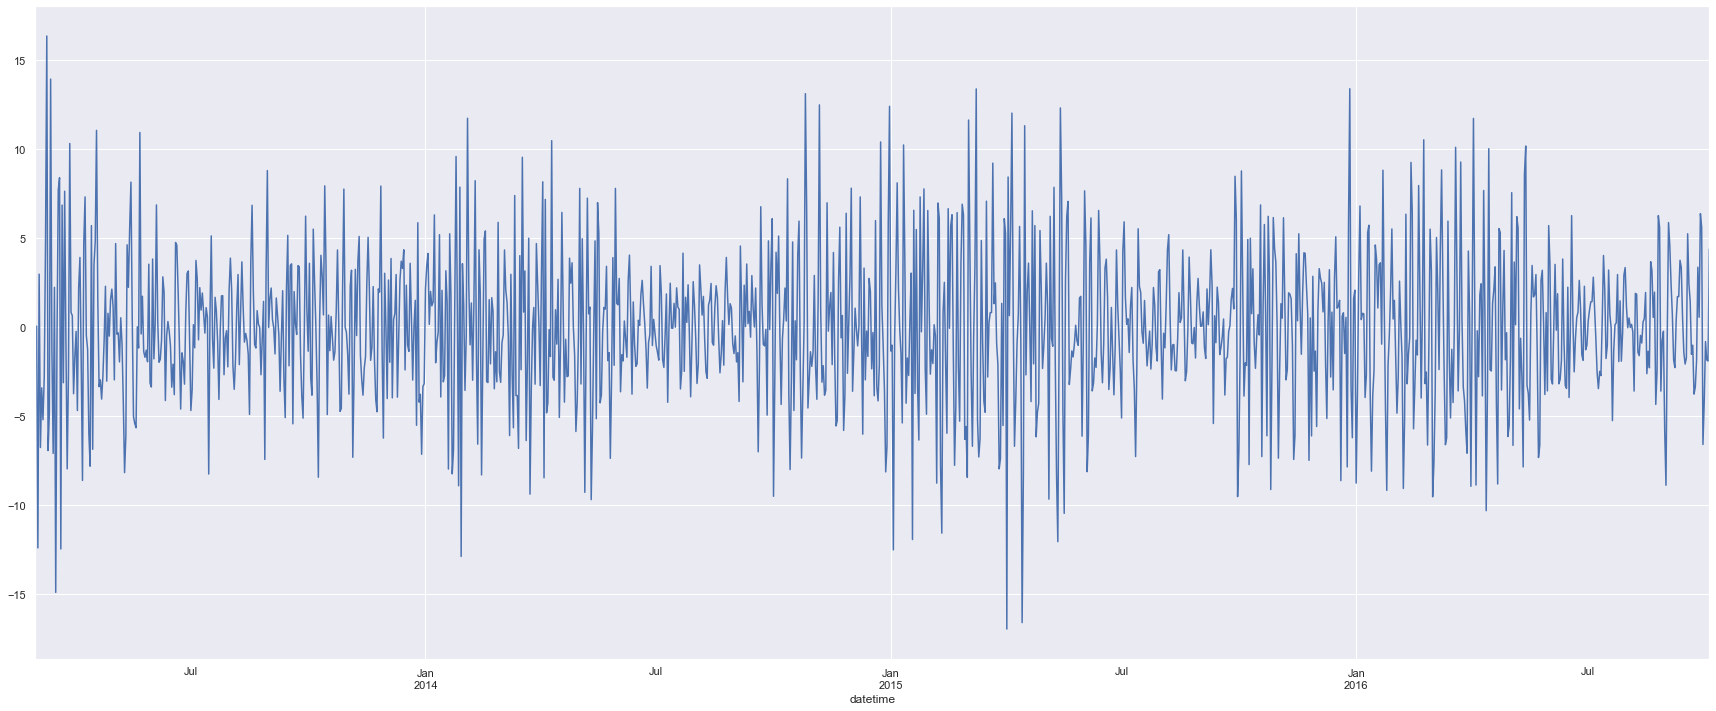

In [2167]:
df_train['p_d1'].plot()

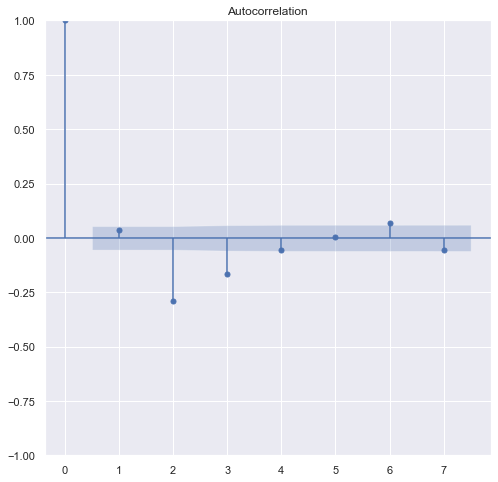

In [2168]:
sns.set(rc={'figure.figsize':(8,8)})
sm.graphics.tsa.plot_acf(df_train['p_d1'][1:],lags=7)
plt.show()

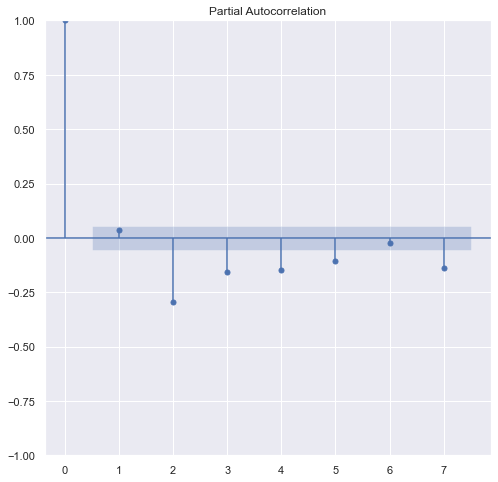

In [2169]:
sns.set(rc={'figure.figsize':(8,8)})
sm.graphics.tsa.plot_pacf(df_train['p_d1'][1:],lags=7)
plt.show()

In [2170]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train['PRES'],order=(1,1,1),trend=None,seasonal_order=(1,1,0,30),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              PRES   No. Observations:                 1314
Model:             ARIMA(1, 1, 1)x(1, 1, [], 30)   Log Likelihood               -3828.344
Date:                           Wed, 15 Feb 2023   AIC                           7664.688
Time:                                   21:30:44   BIC                           7685.316
Sample:                               03-01-2013   HQIC                          7672.432
                                    - 10-04-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6412      0.026     24.347      0.000       0.590       0.693
ma.L1         -0.9395      0.013    -73.758      0.000      -0.964      -0.915
ar.S.L30      -0.5173      0.022    -23.336      0.000      -0.561      -0.474
sigma2        22.6891      0.788     28.782      0.000      21.144      24.234
===================================================================================
Ljung-Box (L1) (Q):                  37.62   Jarque-Bera (JB):                36.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.18
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2171]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train['PRES'],order=(4,1,3),trend=None,seasonal_order=(0,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1314
Model:             ARIMA(4, 1, 3)x(0, 1, [], 7)   Log Likelihood               -3921.308
Date:                          Wed, 15 Feb 2023   AIC                           7858.617
Time:                                  21:30:46   BIC                           7900.014
Sample:                              03-01-2013   HQIC                          7874.146
                                   - 10-04-2016                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7858      0.024    -32.447      0.000      -0.833      -0.738
ar.L2          0.1696      0.032      5.307      0.000       0.107       0.232
ar.L3          0.2482      0.031      8.059      0.000       0.188       0.309
ar.L4         -0.0070      0.024     -0.290      0.772      -0.055       0.041
ma.L1          0.8029    489.127      0.002      0.999    -957.869     959.475
ma.L2         -0.8031    881.844     -0.001      0.999   -1729.186    1727.580
ma.L3         -0.9998    489.042     -0.002      0.998    -959.504     957.504
sigma2        23.4665   1.15e+04      0.002      0.998   -2.25e+04    2.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                93.54
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.01
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2172]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['PRES'],order=(5,1,3),trend=None,seasonal_order=(1,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1461
Model:             ARIMA(5, 1, 3)x(1, 1, [], 7)   Log Likelihood               -4232.901
Date:                          Wed, 15 Feb 2023   AIC                           8485.801
Time:                                  21:30:52   BIC                           8538.615
Sample:                              03-01-2013   HQIC                          8505.507
                                   - 02-28-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8842      0.025    -35.849      0.000      -0.933      -0.836
ar.L2          0.1796      0.034      5.232      0.000       0.112       0.247
ar.L3          0.3444      0.030     11.356      0.000       0.285       0.404
ar.L4         -0.0705      0.032     -2.186      0.029      -0.134      -0.007
ar.L5          0.0013      0.025      0.052      0.959      -0.047       0.049
ma.L1          0.8022     99.490      0.008      0.994    -194.194     195.798
ma.L2         -0.8025    179.304     -0.004      0.996    -352.232     350.627
ma.L3         -0.9997     99.460     -0.010      0.992    -195.937     193.938
ar.S.L7       -0.4923      0.021    -23.236      0.000      -0.534      -0.451
sigma2        19.5805   1948.111      0.010      0.992   -3798.648    3837.809
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                54.76
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2173]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['PRES'],order=(2,1,2),trend=None,seasonal_order=(1,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1461
Model:             ARIMA(2, 1, 2)x(1, 1, [], 7)   Log Likelihood               -4308.590
Date:                          Wed, 15 Feb 2023   AIC                           8629.180
Time:                                  21:30:55   BIC                           8660.868
Sample:                              03-01-2013   HQIC                          8641.004
                                   - 02-28-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4164      0.082      5.079      0.000       0.256       0.577
ar.L2          0.0246      0.060      0.408      0.683      -0.094       0.143
ma.L1         -0.5987      0.274     -2.186      0.029      -1.136      -0.062
ma.L2         -0.4013      0.135     -2.975      0.003      -0.666      -0.137
ar.S.L7       -0.5380      0.019    -28.834      0.000      -0.575      -0.501
sigma2        21.8962      5.872      3.729      0.000      10.388      33.405
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.64
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2174]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['PRES'],order=(4,1,3),trend=None,seasonal_order=(1,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1461
Model:             ARIMA(4, 1, 3)x(1, 1, [], 7)   Log Likelihood               -4232.901
Date:                          Wed, 15 Feb 2023   AIC                           8483.801
Time:                                  21:31:01   BIC                           8531.334
Sample:                              03-01-2013   HQIC                          8501.537
                                   - 02-28-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8851      0.025    -35.813      0.000      -0.934      -0.837
ar.L2          0.1788      0.033      5.370      0.000       0.114       0.244
ar.L3          0.3441      0.030     11.345      0.000       0.285       0.404
ar.L4         -0.0716      0.024     -3.038      0.002      -0.118      -0.025
ma.L1          0.8022      3.018      0.266      0.790      -5.113       6.718
ma.L2         -0.8026      5.441     -0.147      0.883     -11.467       9.862
ma.L3         -0.9997      3.020     -0.331      0.741      -6.919       4.920
ar.S.L7       -0.4912      0.021    -23.920      0.000      -0.531      -0.451
sigma2        19.6181     59.260      0.331      0.741     -96.529     135.766
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                54.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2175]:
pred=result.predict(start='2013-03-31',end='2017-03-31')
df_test['pred_arima']=pred
df_test

,PRES,pred_PRES,pred_arima
datetime,,,
2016-10-05,1014.31,1013.452348,1015.350253
2016-10-06,1020.78,1012.797604,1011.665175
2016-10-07,1015.28,1014.122345,1016.420551
2016-10-08,1018.00,1009.527479,1010.523842
2016-10-09,1018.90,1012.451741,1016.615437
...,...,...,...
2017-02-24,1021.01,1022.336407,1029.380009
2017-02-25,1018.81,1021.419741,1013.601511
2017-02-26,1020.34,1025.089741,1018.412409


In [2176]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_arima']))

MAPE: 0.003968093092766533


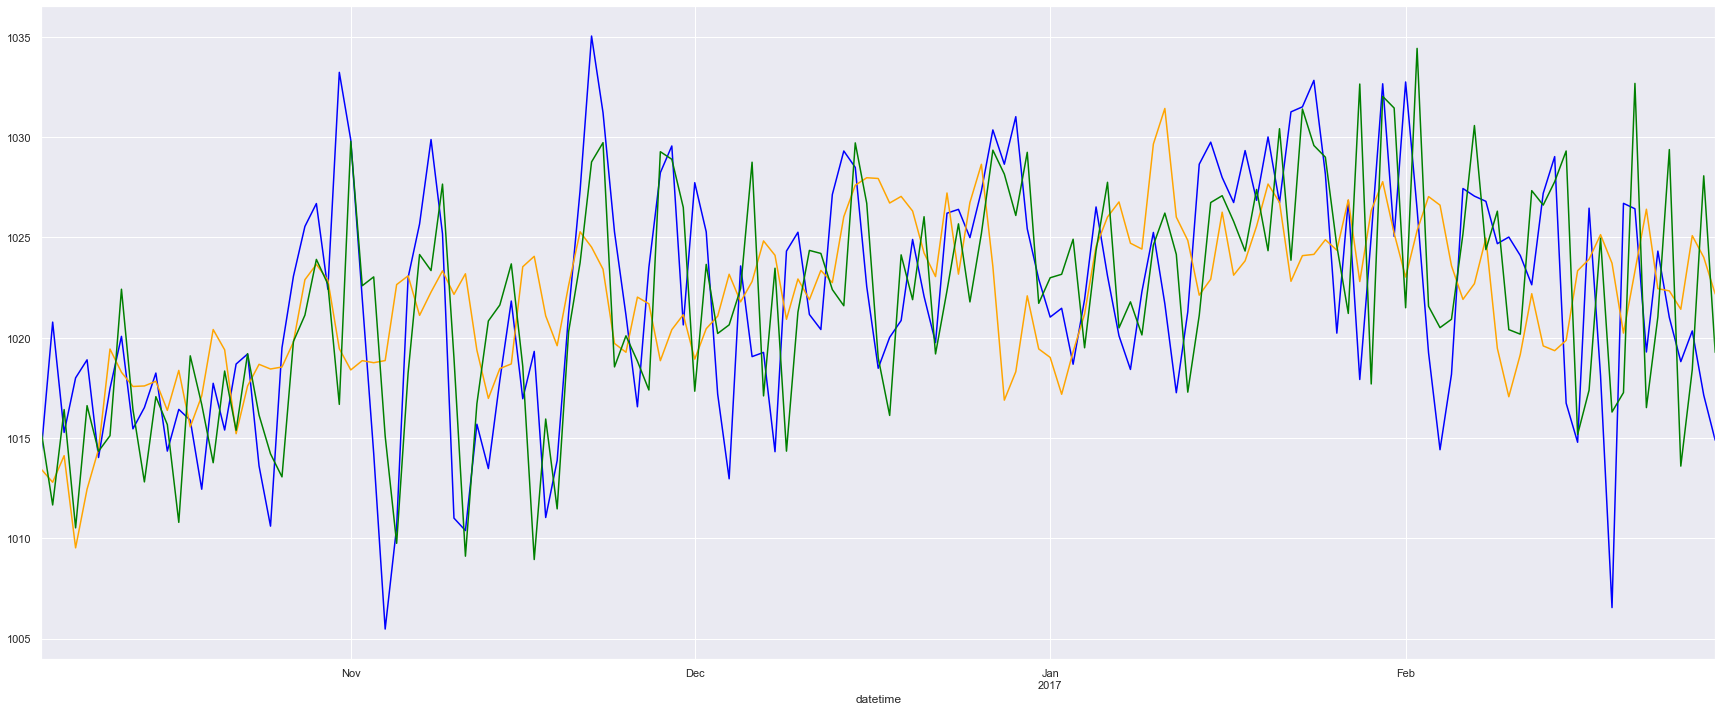

In [2177]:
sns.set(rc={'figure.figsize':(30,12)})
df_test['PRES'].plot(color='blue')
df_test['pred_PRES'].plot(color='orange')
df_test['pred_arima'].plot(color='green')
plt.show()

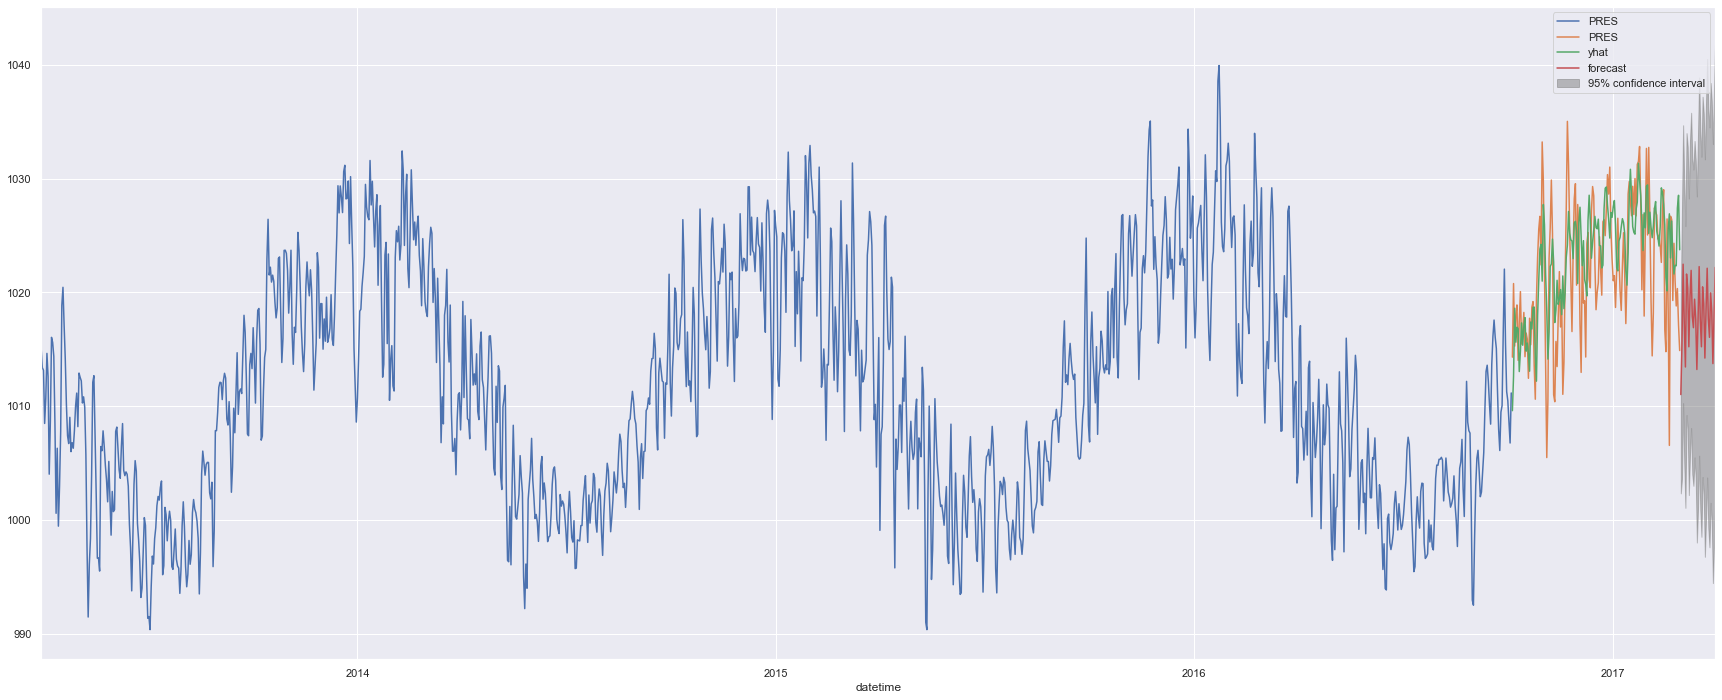

In [2178]:
from statsmodels.graphics.tsaplots import plot_predict

sns.set(rc={'figure.figsize':(30,12)})
# result.plot_predict('01-03-2017','31-03-2017')
fig, ax = plt.subplots()

ax = train_ts.loc['03-31-2013':].plot(ax=ax)
ax = test_ts.loc['2016-10-05':].plot(ax=ax)
plot_predict(result, '2017-03-01','2017-03-31', ax=ax)

plt.show()

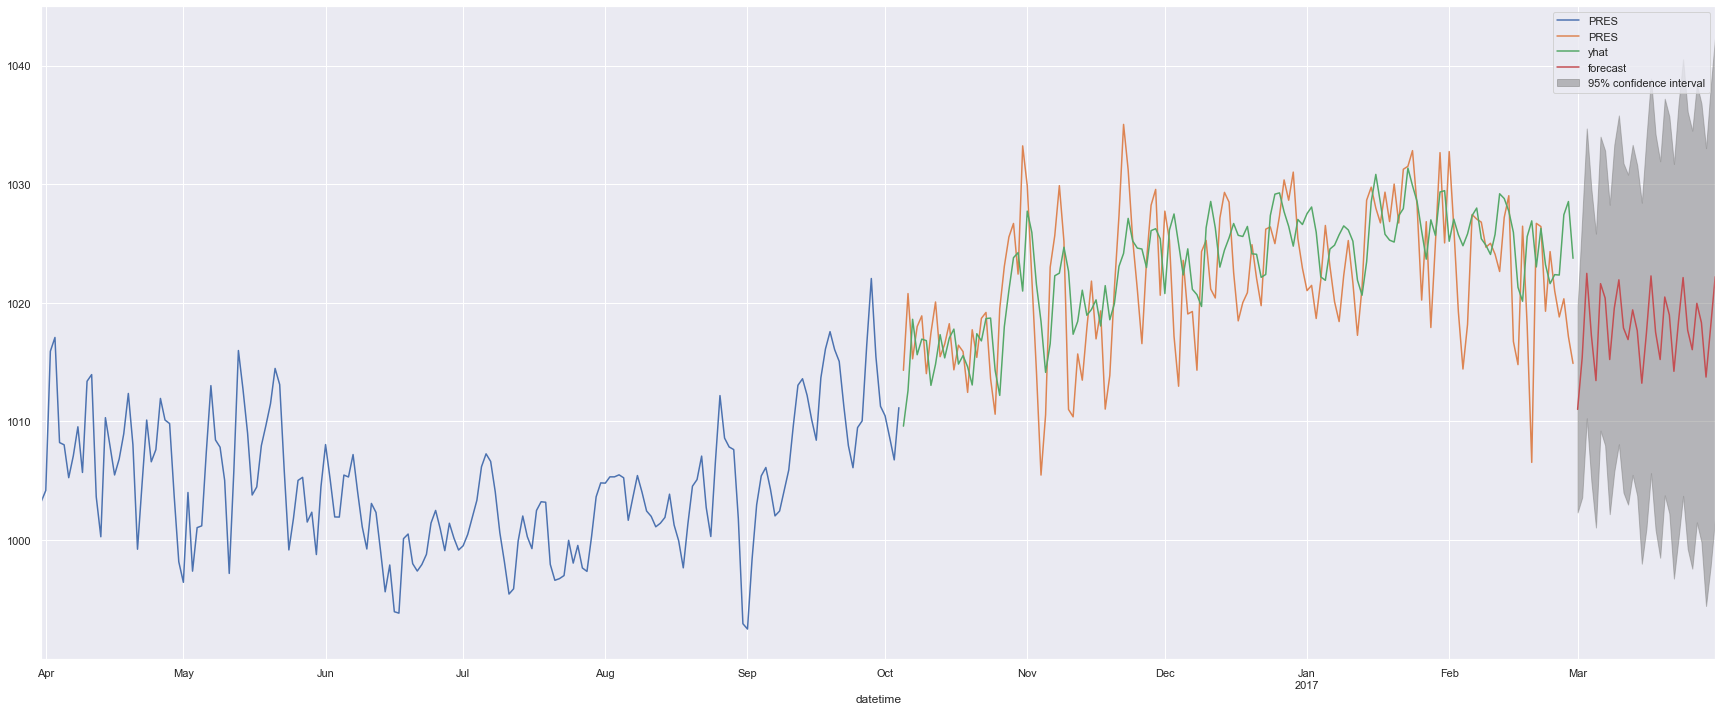

In [2179]:
from statsmodels.graphics.tsaplots import plot_predict

sns.set(rc={'figure.figsize':(30,12)})
# result.plot_predict('01-03-2017','31-03-2017')
fig, ax = plt.subplots()

ax = train_ts.loc['03-31-2016':].plot(ax=ax)
ax = test_ts.loc['2016-10-05':].plot(ax=ax)
plot_predict(result, '2017-03-01','2017-03-31', ax=ax)

plt.show()